# 04 - Categorical Plots in Seaborn

## Goal
Learn Seaborn's categorical plots to compare distributions and statistical summaries across **categories**.

## Quick cheat sheet
| Category | Plot | Function | Best for | Notes |
|---|---|---|---|---|
| Categorical scatter | Strip | `sns.stripplot()` | Raw points + jitter | Good for small/medium data; overlap can happen. |
| Categorical scatter | Swarm | `sns.swarmplot()` | Raw points without overlap | Looks great, but can be slow for large datasets. |
| Distribution estimate | Box | `sns.boxplot()` | Median, quartiles, outliers | Robust summary; hides multimodality. |
| Distribution estimate | Violin | `sns.violinplot()` | KDE density + summary | Shows shape; bandwidth affects look. |
| Statistical estimate | Bar | `sns.barplot()` | Mean + error bars | Shows aggregated estimate (not raw counts). |
| Statistical estimate | Point | `sns.pointplot()` | Point estimate + error bars | Great for slope graphs / interactions. |
| Frequency | Count | `sns.countplot()` | Frequency of categories | Works on categorical variables only. |

## Common dataset columns used here
- `tips`: `day`, `time`, `sex`, `smoker`, `total_bill`, `tip`, `size`

Tip: In categorical plots, the **x** axis is usually categorical and **y** is numeric.


In [1]:
# Setup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", context="notebook")

tips = sns.load_dataset('tips')
print('tips shape:', tips.shape)
print(tips.head())


tips shape: (244, 7)
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


## 1) Categorical scatter
Categorical scatter plots show **every observation**.

### `stripplot()` (jitter)
- Adds random horizontal jitter to reduce overlap.
- Key params: `jitter=True/float`, `dodge=True`, `alpha`, `size`.

### `swarmplot()` (non-overlapping)
- Adjusts points to avoid overlap.
- Looks cleaner than stripplot, but may be slower for large datasets.


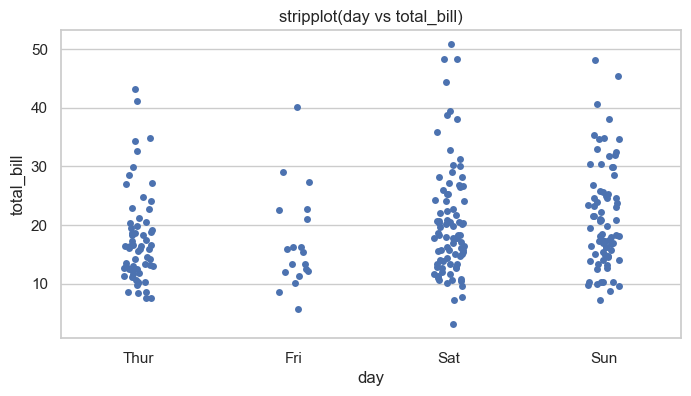

In [2]:
# stripplot: jitter helps show overlapping points
plt.figure(figsize=(8, 4))
sns.stripplot(data=tips, x='day', y='total_bill', jitter=True)
plt.title('stripplot(day vs total_bill)')
plt.show()


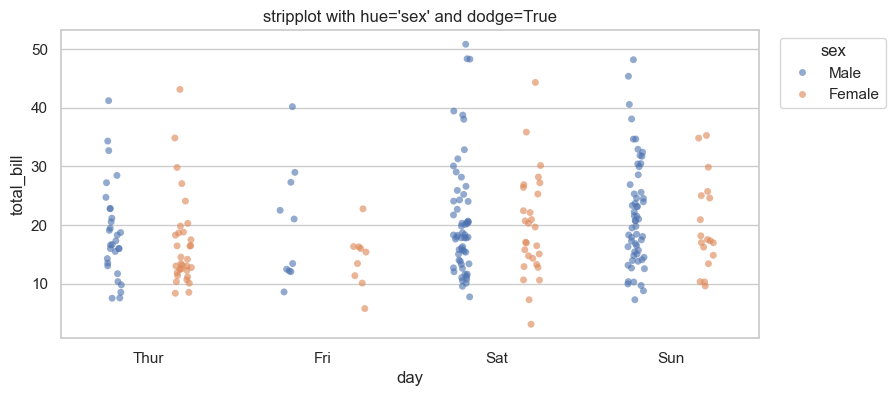

In [3]:
# stripplot with hue + dodge (split categories)
plt.figure(figsize=(9, 4))
sns.stripplot(
    data=tips,
    x='day',
    y='total_bill',
    hue='sex',
    dodge=True,
    jitter=True,
    alpha=0.6
)
plt.title("stripplot with hue='sex' and dodge=True")
plt.legend(title='sex', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


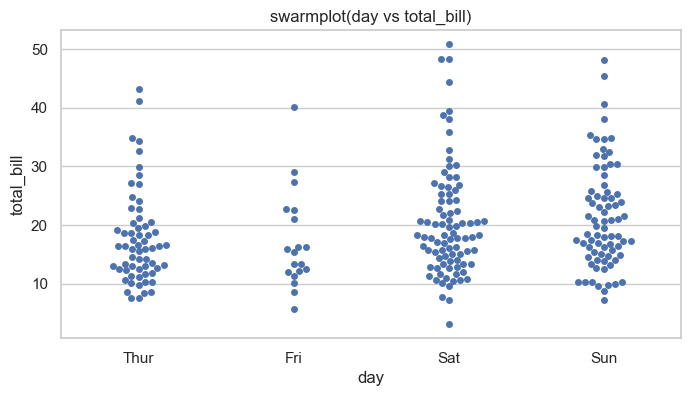

In [4]:
# swarmplot: non-overlapping points (best for smaller datasets)
plt.figure(figsize=(8, 4))
sns.swarmplot(data=tips, x='day', y='total_bill')
plt.title('swarmplot(day vs total_bill)')
plt.show()


## 2) Distribution estimates
Sometimes raw points are too dense, so we use distribution summaries.

### `boxplot()` (quartiles)
A standard boxplot shows:
- **Median** (line inside the box)
- **IQR** (box from Q1 to Q3)
- **Whiskers** (typically up to 1.5 × IQR)
- **Outliers** (points beyond whiskers)

### `violinplot()` (density)
A violin plot shows a KDE-based density shape.
- Great for seeing **multi-modality**.
- Sensitive to bandwidth (smoothing), especially with small samples.


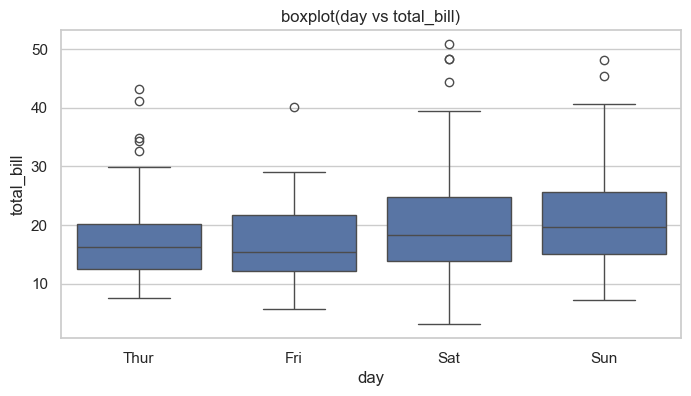

In [5]:
# boxplot: robust distribution summary
plt.figure(figsize=(8, 4))
sns.boxplot(data=tips, x='day', y='total_bill')
plt.title('boxplot(day vs total_bill)')
plt.show()


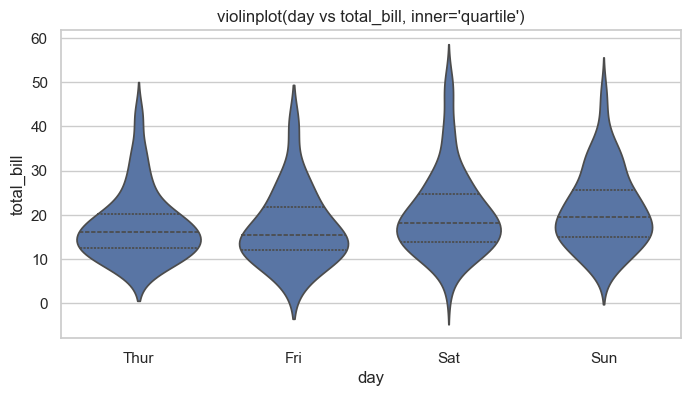

In [6]:
# violinplot: density shape
plt.figure(figsize=(8, 4))
sns.violinplot(data=tips, x='day', y='total_bill', inner='quartile')
plt.title("violinplot(day vs total_bill, inner='quartile')")
plt.show()


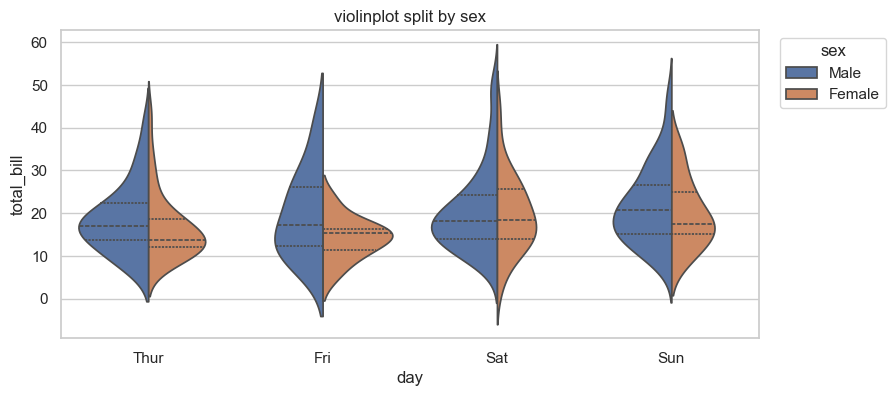

In [7]:
# violinplot split by hue (binary hue works well)
plt.figure(figsize=(9, 4))
sns.violinplot(
    data=tips,
    x='day',
    y='total_bill',
    hue='sex',
    split=True,
    inner='quartile'
)
plt.title("violinplot split by sex")
plt.legend(title='sex', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


## 3) Statistical estimates
These plots show an **aggregated estimate** (e.g., mean) with uncertainty.

### `barplot()` (mean + error bars)
- Default estimator is mean.
- Error bars: in newer seaborn versions, use `errorbar=('ci', 95)` (or `errorbar=None`).

### `pointplot()` (slope graphs)
- Similar to barplot but uses points and lines.
- Great for comparing **interactions** (e.g., how tip changes by day for lunch vs dinner).


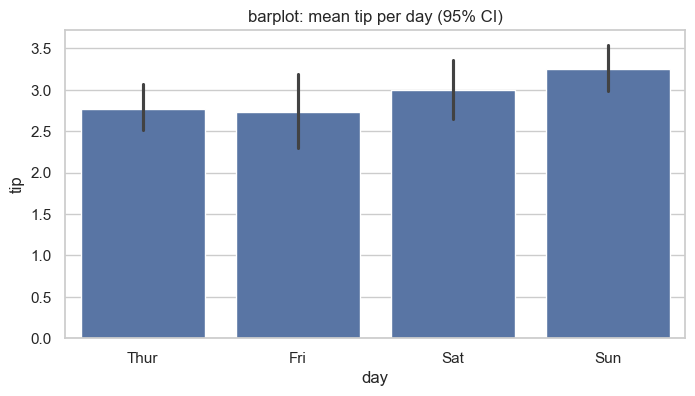

In [8]:
# barplot: mean tip per day
plt.figure(figsize=(8, 4))
sns.barplot(data=tips, x='day', y='tip', errorbar=('ci', 95))
plt.title("barplot: mean tip per day (95% CI)")
plt.show()


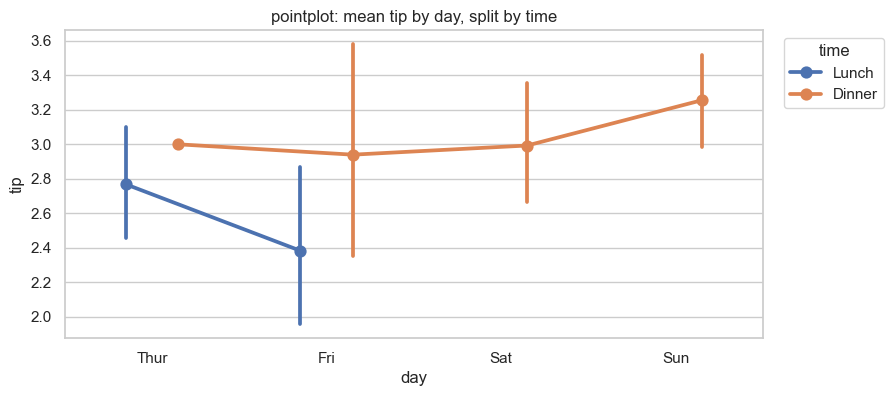

In [9]:
# pointplot: slope graph for interaction (day x time)
plt.figure(figsize=(9, 4))
sns.pointplot(
    data=tips,
    x='day',
    y='tip',
    hue='time',
    errorbar=('ci', 95),
    dodge=0.3
)
plt.title("pointplot: mean tip by day, split by time")
plt.legend(title='time', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


## 4) Count plots (`countplot`)
Use countplot to show the **frequency** of categorical levels.

Common options:
- `order=...` to control category order.
- `hue=...` for grouped counts.


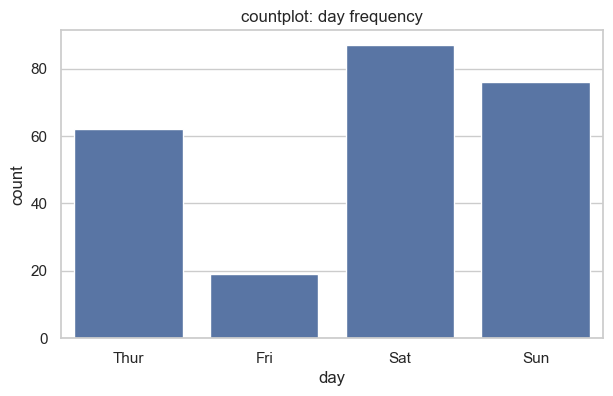

In [10]:
# countplot: frequency of days
plt.figure(figsize=(7, 4))
sns.countplot(data=tips, x='day')
plt.title('countplot: day frequency')
plt.show()


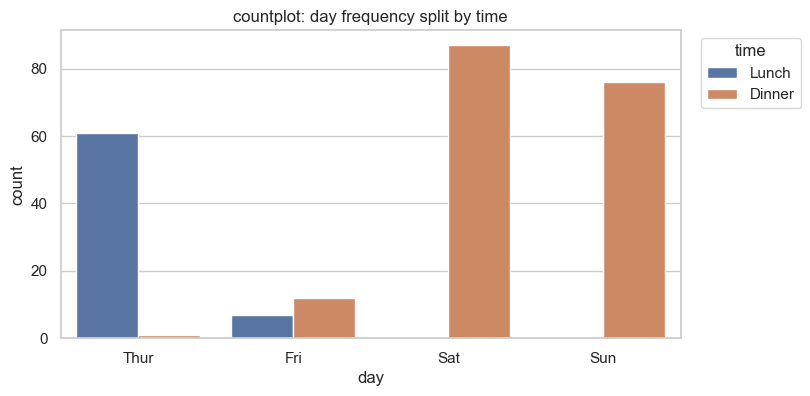

In [11]:
# countplot with hue
plt.figure(figsize=(8, 4))
sns.countplot(data=tips, x='day', hue='time')
plt.title("countplot: day frequency split by time")
plt.legend(title='time', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


## 5) Combining plots: swarmplot over violinplot
A common pattern:
- **Violin** to show the distribution shape.
- **Swarm** to show individual observations.

Important: When overlaying, reduce point size and increase transparency so the plot stays readable.


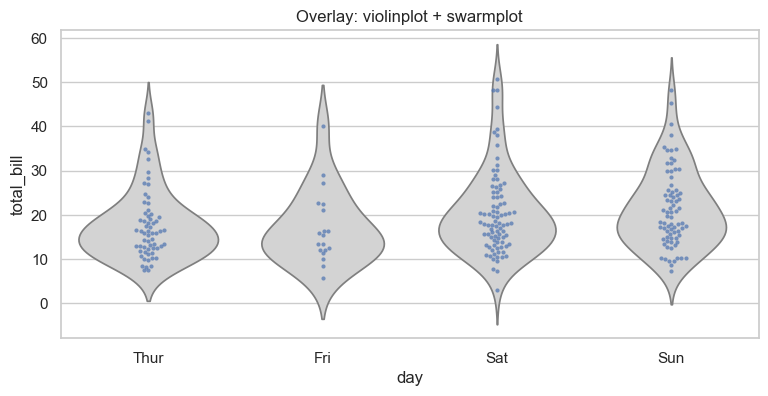

In [12]:
# Overlay: violin + swarm
plt.figure(figsize=(9, 4))

sns.violinplot(data=tips, x='day', y='total_bill', inner=None, color='lightgray')
sns.swarmplot(data=tips, x='day', y='total_bill', size=3, alpha=0.7)

plt.title('Overlay: violinplot + swarmplot')
plt.show()


---
## Practice set
Use the `tips` dataset (already loaded).

### A) Strip vs Swarm
1. Create a `stripplot` of `tip` (y) by `day` (x) with `hue='smoker'`, `dodge=True`, and `jitter=True`.
2. Create the same plot using `swarmplot` (remove jitter).
3. Which one looks better? When does swarm become too slow / crowded?

### B) Box vs Violin
4. Create a `boxplot` of `tip` by `day` with `hue='sex'`.
5. Create a `violinplot` of `tip` by `day` with `hue='sex'` and `split=True`.

### C) Bar vs Point
6. Create a `barplot` of mean `total_bill` by `day` with error bars.
7. Create a `pointplot` of mean `total_bill` by `day` with `hue='time'`.

### D) Countplot
8. Use `countplot` to show counts of `smoker`.
9. Use `countplot` to show counts of `day` split by `sex`.

### E) Overlay
10. Create a violin + swarm overlay for `tip` by `day`.

### Challenge
11. Write a helper function `cat_summary(df, x, y, hue=None)` that draws:
    - left: `boxplot`
    - right: `swarmplot`
   on a 1x2 figure.


In [13]:
# Practice solutions template (fill TODOs)

# A) Strip vs Swarm
# TODO 1-3

# B) Box vs Violin
# TODO 4-5

# C) Bar vs Point
# TODO 6-7

# D) Countplot
# TODO 8-9

# E) Overlay
# TODO 10

# Challenge
from typing import Optional

def cat_summary(df, x: str, y: str, hue: Optional[str] = None):
    # TODO: Create a 1x2 figure with boxplot and swarmplot
    pass


## Reference links
- Seaborn categorical tutorial: https://seaborn.pydata.org/tutorial/categorical.html
- `stripplot`: https://seaborn.pydata.org/generated/seaborn.stripplot.html
- `swarmplot`: https://seaborn.pydata.org/generated/seaborn.swarmplot.html
- `boxplot`: https://seaborn.pydata.org/generated/seaborn.boxplot.html
- `violinplot`: https://seaborn.pydata.org/generated/seaborn.violinplot.html
- `barplot`: https://seaborn.pydata.org/generated/seaborn.barplot.html
- `pointplot`: https://seaborn.pydata.org/generated/seaborn.pointplot.html
- `countplot`: https://seaborn.pydata.org/generated/seaborn.countplot.html
